# PROBLEM STATEMENT
when given certain player characteristics to predict the type of player whether Attacker, midfielder,defender or Goal keeper

OUTPUT (player classification by position) Expected :

predicting the player classification whether attacker,defender, midfielder or Goalkeeper

Project code implementation by : GADDAM HEMANTH KRISHNA


In [ ]:
import numpy as np
import pandas as pd
#from matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving players_20.csv to players_20.csv


In [ ]:
Fifadata = pd.read_csv('players_20.csv')
Fifadata.head()

In [ ]:
Fifadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [ ]:
Fifadata.isnull().sum()

sofifa_id        0
player_url       0
short_name       0
long_name        0
age              0
              ... 
lb            2036
lcb           2036
cb            2036
rcb           2036
rb            2036
Length: 104, dtype: int64

In [ ]:
Fifadata.shape

(18278, 104)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


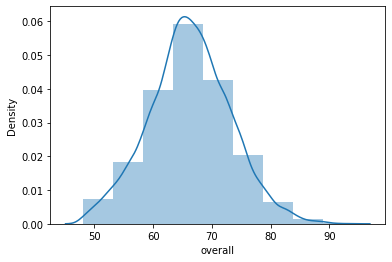

In [ ]:
#overall perfomace of the players
bins = np.linspace(Fifadata.overall.min(),Fifadata.overall.max(),10) #start-stop-step
sns.distplot(Fifadata.overall,bins=bins,hist=True,)

In [ ]:
#using player tags let's trasnform that column
def player_tags(tags):
    tags_after_split=tags['player_positions'].split(', ') 
    lenth_tags = len(tags_after_split)
    #let's put the most common tag as the player group (if he has more than one tag)
    if lenth_tags>1:
        counter_most_tag = [0,0,0,0]
        for tags_after_split in tags_after_split:
            if tags_after_split in ['ST', 'LW', 'RW','CF']: #4
                count_index = 0 #ATTACKER
            elif tags_after_split in ['CAM', 'LM', 'CM', 'RM', 'CDM','LDM','RDM','CAM','LAM','RAM','LCM','RCM']: #5
                count_index = 1 #MIDFIELDER
            elif tags_after_split in ['LWB', 'RWB', 'LB', 'CB', 'RB','LCB','RCB','']: #5
                count_index = 2 #DEFENDER
            elif tags_after_split in ['GK']: #1
                count_index = 3 #GOALKEEPER
            else:
                continue
            counter_most_tag[count_index]+=1  #will increase the most repeated tag
        return counter_most_tag.index(max(counter_most_tag))

    else:

        tags_only_one = tags_after_split[0]
        if tags_only_one in ['ST', 'LW', 'RW','CF','LF','RF']: #4
            return 0 #ATTACKER
        elif tags_only_one in ['CAM', 'LM', 'CM', 'RM', 'CDM','LDM','RDM','CAM','LAM','RAM','LCM','RCM']: #5
            return 1 #MIDFIELDER
        elif tags_only_one in ['LWB', 'RWB', 'LB', 'CB', 'RB','LCB','RCB','']: #5
            return 2 #DEFENDER
        elif tags_only_one in ['GK']: #1
            return 3 #GOALKEEPER



In [ ]:
#using team_position tags let's trasnform that column
def team_tags(tags):
    tags_after_split=tags['team_position']
    tags_only_one = tags_after_split
    if tags_only_one in ['ST', 'LW', 'RW','CF','LF','RF']: #4
        return 0 #ATTACKER
    elif tags_only_one in ['CAM', 'LM', 'CM', 'RM', 'CDM','LDM','RDM','CAM','LAM','RAM','LCM','RCM']: #5
        return 1 #MIDFIELDER
    elif tags_only_one in ['LWB', 'RWB', 'LB', 'CB', 'RB','LCB','RCB']: #5
        return 2 #DEFENDER
    elif tags_only_one in ['GK']: #1
        return 3 #GOALKEEPER  

In [ ]:
#using teams nation_position tags let's trasnform that column
def team_tags1(tags):
    #tags_after_split_team=tags['nation_position']
    tags_only_one_team = tags['team_position']
    if tags_only_one_team in ["ST","CF","LS","RF","LF","RS","LW","RW"]:
        return 0 #ATTACKER
    elif tags_only_one_team in ["RCM","CAM","CDM","LDM","RM","LCM","LM","RDM","RAM","CM","LAM"]:
        return 1 #MIDFIELDER
    elif tags_only_one_team in ["LCB","RCB","LB","RB","CB","RWB","LWB"]:
        return 2 #DEFENDER
    elif tags_only_one_team in ['GK']: #1
        return 3 #GOALKEEPER  
    else:
        return 4 #GOALKEEPER may be a substitute 

In [ ]:
Fifadata['player_positions'] = Fifadata.apply(player_tags, axis=1)

In [ ]:
Fifadata['team_position'] = Fifadata.apply(team_tags, axis=1)

In [ ]:
Selective_data = Fifadata.drop(['sofifa_id','player_url','short_name','long_name','dob','player_tags','team_jersey_number','loaned_from','joined','contract_valid_until','nation_position','nation_jersey_number','player_traits',"ls","st","rs","lw","lf","cf","rf","rw","lam","cam","ram","lm","lcm","cm","rcm","rm","lwb","ldm","cdm","rdm","rwb","lb","lcb","cb","rcb","rb"],axis=1)
Selective_data

,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,team_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,0,Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,0.0,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,34,187,83,Portugal,Juventus,93,93,58500000,405000,0,Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,0.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,0,Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,1.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,3,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,0,Right,4,4,4,High/Medium,Normal,Yes,184500000.0,0.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,22,186,79,China PR,Beijing Renhe FC,48,56,40000,2000,2,Right,1,3,2,Medium/High,Normal,No,70000.0,NaN,57.0,23.0,28.0,33.0,47.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,21,17,40,35,27,24,23,21,28,35,56,58,45,40,73,36,70,60,47,16,46,48,28,25,39,41,45,50,52,5,5,13,5,14
18274,22,177,66,China PR,Shanghai SIPG FC,48,56,40000,2000,2,Right,1,2,2,Medium/Medium,Normal,No,72000.0,NaN,58.0,24.0,33.0,35.0,48.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,24,20,42,43,28,32,24,29,39,31,55,61,43,41,76,33,72,55,44,20,42,49,23,25,37,35,42,53,57,13,6,14,11,9
18275,19,186,75,China PR,Hebei China Fortune FC,48,56,40000,1000,1,Right,1,2,2,Low/Medium,Lean,No,70000.0,NaN,54.0,35.0,44.0,45.0,48.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,32,33,49,53,32,40,32,32,55,49,55,54,52,52,57,48,60,50,51,26,50,45,38,38,36,39,46,52,46,7,8,10,6,14
18276,18,185,74,China PR,Shanghai Greenland Shenhua FC,48,54,40000,1000,1,Right,1,2,2,Low/Low,Lean,No,70000.0,NaN,59.0,35.0,47.0,47.0,45.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,39,34,47,54,28,42,37,39,48,49,55,63,55,54,59,46,61,42,55,28,57,49,31,48,36,40,39,44,54,14,9,13,13,13


In [ ]:
X=Selective_data.drop(['player_positions'],axis=1)
y=Selective_data.player_positions
X

,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,team_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,0.0,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,34,187,83,Portugal,Juventus,93,93,58500000,405000,Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,0.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,1.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,Right,4,4,4,High/Medium,Normal,Yes,184500000.0,0.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,22,186,79,China PR,Beijing Renhe FC,48,56,40000,2000,Right,1,3,2,Medium/High,Normal,No,70000.0,NaN,57.0,23.0,28.0,33.0,47.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,21,17,40,35,27,24,23,21,28,35,56,58,45,40,73,36,70,60,47,16,46,48,28,25,39,41,45,50,52,5,5,13,5,14
18274,22,177,66,China PR,Shanghai SIPG FC,48,56,40000,2000,Right,1,2,2,Medium/Medium,Normal,No,72000.0,NaN,58.0,24.0,33.0,35.0,48.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,24,20,42,43,28,32,24,29,39,31,55,61,43,41,76,33,72,55,44,20,42,49,23,25,37,35,42,53,57,13,6,14,11,9
18275,19,186,75,China PR,Hebei China Fortune FC,48,56,40000,1000,Right,1,2,2,Low/Medium,Lean,No,70000.0,NaN,54.0,35.0,44.0,45.0,48.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,32,33,49,53,32,40,32,32,55,49,55,54,52,52,57,48,60,50,51,26,50,45,38,38,36,39,46,52,46,7,8,10,6,14
18276,18,185,74,China PR,Shanghai Greenland Shenhua FC,48,54,40000,1000,Right,1,2,2,Low/Low,Lean,No,70000.0,NaN,59.0,35.0,47.0,47.0,45.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,39,34,47,54,28,42,37,39,48,49,55,63,55,54,59,46,61,42,55,28,57,49,31,48,36,40,39,44,54,14,9,13,13,13


In [ ]:
Null_value_columns = X.isnull().sum()
Null_value_columns_names = X.columns

In [ ]:
X['team_position'] = X.apply(team_tags1, axis=1)

In [ ]:
#label encoding the string data
enc = LabelEncoder()
X['real_face'] = enc.fit_transform(X.real_face)
X['preferred_foot'] = enc.fit_transform(X.preferred_foot)
X['nationality'] = enc.fit_transform(X.nationality)
X['club'] = enc.fit_transform(X.club)
X['body_type'] = enc.fit_transform(X.body_type)
X['real_face'] = enc.fit_transform(X.real_face)
X['work_rate'] = enc.fit_transform(X.work_rate)

X.update(X[['pace','shooting','passing','dribbling','defending','physic','gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning']].fillna(0))
X

In [ ]:
#filling missing numerical data with Mean values
X['release_clause_eur'].fillna(round(X['release_clause_eur'].mean()),inplace=True)
X['team_position'].fillna(round(X['release_clause_eur'].mean()),inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
MM = MinMaxScaler(feature_range = (0, 1))
X =MM.fit_transform(X)
X

array([[0.61538462, 0.28571429, 0.36666667, ..., 0.15217391, 0.14444444,
        0.07692308],
       [0.69230769, 0.63265306, 0.55      , ..., 0.15217391, 0.14444444,
        0.10989011],
       [0.42307692, 0.3877551 , 0.3       , ..., 0.15217391, 0.15555556,
        0.10989011],
       ...,
       [0.11538462, 0.6122449 , 0.41666667, ..., 0.09782609, 0.05555556,
        0.14285714],
       [0.07692308, 0.59183673, 0.4       , ..., 0.13043478, 0.13333333,
        0.13186813],
       [0.38461538, 0.53061224, 0.46666667, ..., 0.14130435, 0.08888889,
        0.0989011 ]])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10,test_size=0.3)

#using Logistic Regression

In [ ]:
#Define the model
model = LogisticRegression(C=2,max_iter=10000)
#tran/fit the data
model.fit(X_train,y_train)

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#predict y based in x_test
y_predict = model.predict(X_test) #predicting price

In [ ]:
#evaluation
print(100*accuracy_score(y_test,y_predict))

85.90444930707513


#using RandomForestclasifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200,random_state=0)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.8566739606126915

In [ ]:
pd.crosstab(y_test,y_predict)

col_0,0,1,2,3
player_positions,,,,
0,904,255,15,0
1,159,1758,213,0
2,2,142,1458,0
3,0,0,0,578
